# Here is my first ML project concerns predictions about insurance amount



**Let start with importing libraries wcich allow to prepare data to further actions.**


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Now I import the data from single csv file.

In [18]:
df = pd.read_csv("../InsurancePrediction -1 ML model/insurance.csv")

In [20]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**We see that our data are clear and ready to use. It means that we can skip part of handling with missing data.**




**Lets move to the Exploratory Data Analysis. First of all we want to check how our data look on some charts and also we want to check outliers.**


<Axes: xlabel='bmi', ylabel='charges'>

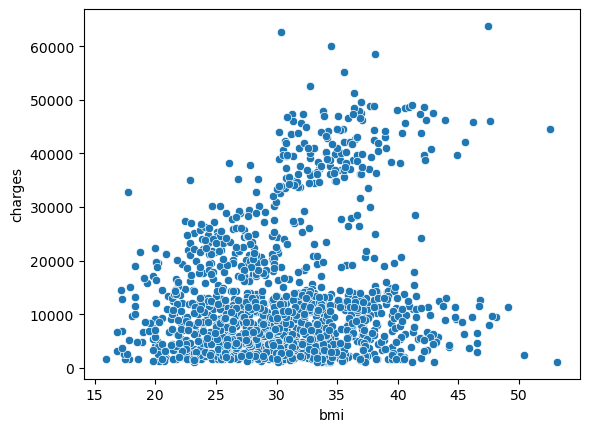

In [56]:
sns.scatterplot(data=df, x="bmi" , y="charges")

<Axes: xlabel='bmi', ylabel='charges'>

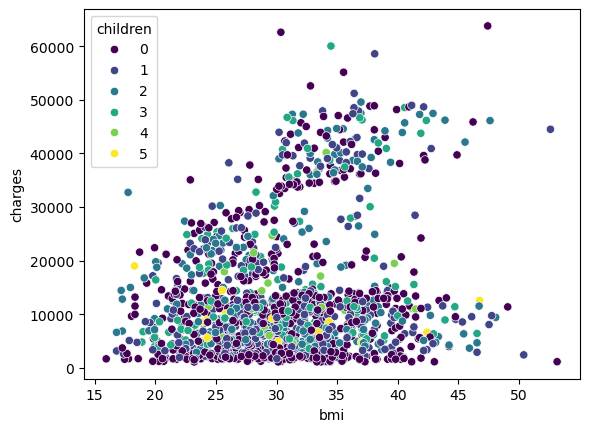

In [68]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="children", palette="viridis")

<Axes: xlabel='bmi', ylabel='charges'>

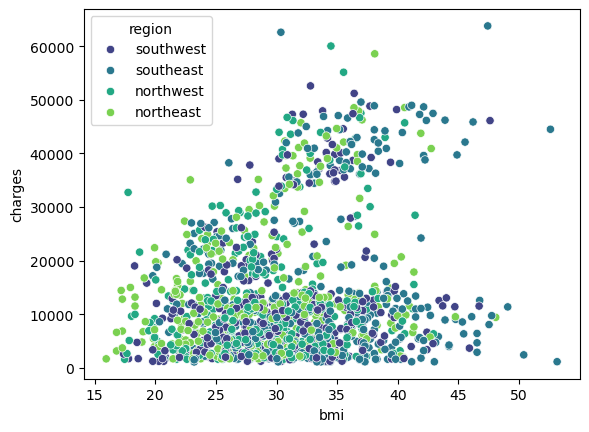

In [72]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="region", palette="viridis")

<Axes: xlabel='bmi', ylabel='charges'>

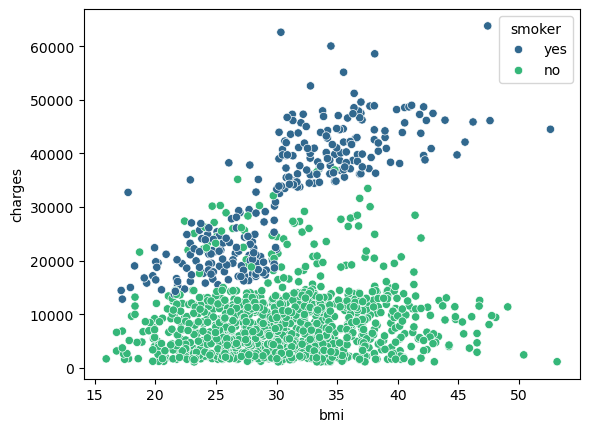

In [74]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="smoker", palette="viridis")

<Axes: xlabel='bmi', ylabel='charges'>

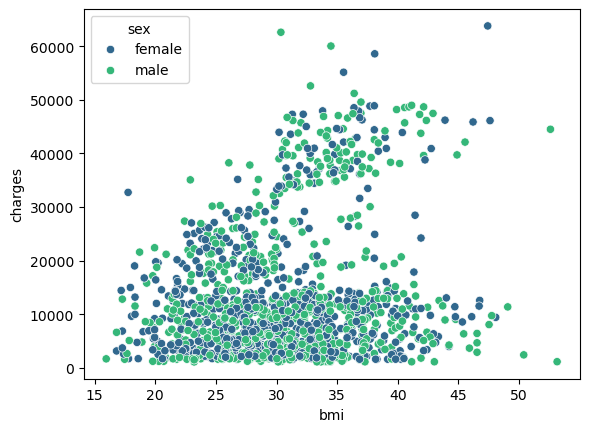

In [78]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="sex", palette="viridis")

**We see the first trend. People who smoke cigarettes have significantly higher insurance charges.**


**Now lets explore histograms.**


In [117]:
max(df["charges"])

63770.42801

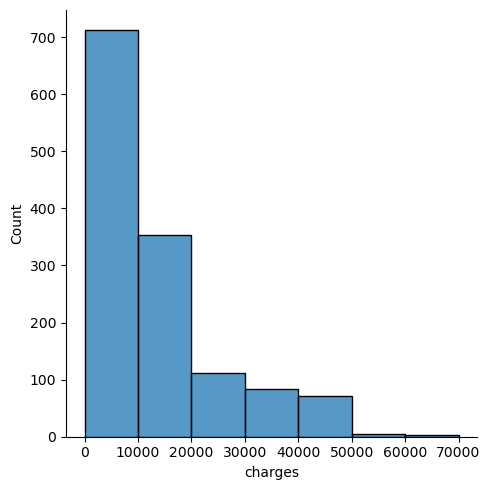

In [113]:

bins=np.arange(0,80000,10000)
bins
sns.displot(data=df, x="charges", bins=bins)

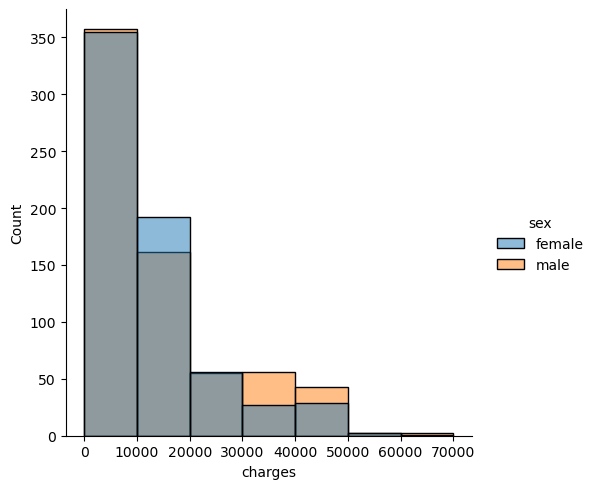

In [137]:

bins=np.arange(0,80000,10000)
bins
sns.displot(data=df, x="charges", bins=bins, hue="sex")

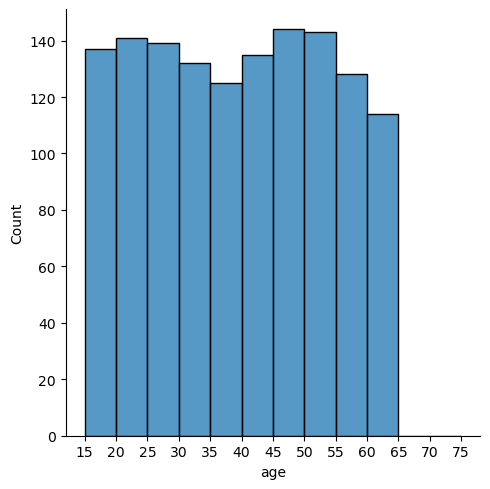

In [135]:
age=np.arange(15,80,5)
age

sns.displot(data=df, x="age", bins=age)
plt.xticks(age);

**We see, that almost half people have charges less or equal 10000. Moreover, we see that people are evenly distributed in terms of age and we don't see strong deviations in charges distributions in terms of sex.**

In [ ]:
**Let's see how boxplot